In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import clone
from sklearn      import linear_model,ensemble,tree,cross_decomposition,dummy,neighbors,kernel_ridge,svm,neural_network,compose

In [2]:
def file_reader(file_location):
    if(file_location.endswith('csv')):
        return pd.read_csv( file_location , engine = 'python', index_col=0)
    elif (file_location.endswith('tsv')):
        return pd.read_csv( file_location , engine = 'python' ,sep = '\t')

In [3]:
def year_str2float(year_quarter):
    if ( year_quarter.endswith('Q1') ):
        return int(year_quarter[:-2]) + 0.25
    elif( year_quarter.endswith('Q2') ):
        return int(year_quarter[:-2]) + 0.50
    elif( year_quarter.endswith('Q3') ):
        return int(year_quarter[:-2]) + 0.75
    elif( year_quarter.endswith('Q4') ):
        return int(year_quarter[:-2]) + 1.00

In [4]:
def get_data(country):
    x        = []
    timeline = [ year_str2float(val) for val in dfx['above65.csv'].index ]
    x.append( timeline )
    for str in strlist:
        x.append( dfx[str][country] )
    y        = dfy[country]
    x        = np.array(x).T
    return x,y

In [5]:
def model_fit(x,y, models):
    xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.3, random_state=0)
    
    min_mse = 999999
    max_r2  = 0
    
    out_model = 0
    
    r2_list  = []
    mse_list = []
    
    for model in models:
        m2 = clone(model)
        m2.fit(xtrain, ytrain)
        
        mse = mean_squared_error(ytest, m2.predict(xtest))
        r2  = r2_score(ytest, m2.predict(xtest))
        
        r2_list.append(r2)
        mse_list.append(mse)
        
        if( mse < min_mse and r2 > max_r2 ):
            out_model =  m2
            min_mse   = mse
            max_r2    = r2
    #model    = linear_model.LinearRegression()
    #model    = tree.DecisionTreeRegressor(random_state=0)
    #model     = ensemble.RandomForestRegressor(n_estimators=4, criterion ='mse', random_state = 0)
    #model.fit(x, y)
    #print('MSE : ',mean_squared_error(ytest, out_model.predict(xtest)))
    
    print(type(out_model).__name__)
    print('MSE :' ,min_mse)
    print('R2 :' ,max_r2)
    return out_model, r2_list, mse_list

In [6]:
all_regs = [
    #linear_model.ARDRegression(),
    #ensemble.AdaBoostRegressor(),
    #ensemble.BaggingRegressor(),
    #linear_model.BayesianRidge(),
    #cross_decomposition.CCA(),
    #tree.DecisionTreeRegressor(),
    #d#ummy.DummyRegressor(),
    #l#inear_model.ElasticNet(),
    #linear_model.ElasticNetCV(),
    #tree.ExtraTreeRegressor(),
    #ensemble.ExtraTreesRegressor(),
    #ensemble.GradientBoostingRegressor(),
    #linear_model.HuberRegressor(),
    neighbors.KNeighborsRegressor(),
    kernel_ridge.KernelRidge(),
    #linear_model.Lars(),
    #linear_model.LarsCV(),
    #linear_model.Lasso(),
    #linear_model.LassoCV(),
    #linear_model.LassoLars(),
    #linear_model.LassoLarsCV(),
    #linear_model.LassoLarsIC(),
    linear_model.LinearRegression(),
    #svm.LinearSVR(),
    #neural_network.MLPRegressor(),
    #svm.NuSVR(),
    #linear_model.OrthogonalMatchingPursuit(),
    #linear_model.OrthogonalMatchingPursuitCV(),
    #cross_decomposition.PLSCanonical(),
    #cros#s_decomposition.PLSRegression(),
    #linear_model.PassiveAggressiveRegressor(),
    #linear_model.RANSACRegressor(),
    ensemble.RandomForestRegressor(n_estimators=4, criterion ='mse', random_state = 0),
    linear_model.Ridge(),
    #linear_model.RidgeCV(alphas = [ 0.1,  1. , 10. ]),
    #linear_model.SGDRegressor(),
    svm.SVR(),
    #linear_model.TheilSenRegressor(max_subpopulation=10000),
    #compose.TransformedTargetRegressor()
]

In [7]:
strlist = [
    'above65.csv',
    #'area.csv',
    #'literacy_rate.csv',
    'corona_cases.csv',
    'mobile_users.csv',
    'total_pop.csv',
    'unemployed.csv'
      ]

dfx = {}
for str in strlist:
    dfx[str] = file_reader('dataset/'+str)
dfy = file_reader('dataset/gdp_change.csv')
countries = file_reader('dataset/Downloaded Dataset/countries.csv')

In [8]:
import warnings
warnings.filterwarnings('ignore')
q3preds = []
r2_list = pd.DataFrame()
mse_list = pd.DataFrame()

for country in countries['Country']:
    print(country)
    x,y                = get_data(country)
    model, r2, mse     = model_fit(x[:-1],y, all_regs)
    r2_list[country]   = r2
    mse_list[country]  = mse
    preds = model.predict(x[-2:])
    q3preds.append( preds[0] )
    print('')

Australia
RandomForestRegressor
MSE : 2.411735529402625
R2 : 0.6293651183856511

Brazil
RandomForestRegressor
MSE : 7.346197238441373
R2 : 0.6280953701676386

Canada
RandomForestRegressor
MSE : 4.0730122434472795
R2 : 0.6407402754011999

United States
RandomForestRegressor
MSE : 0.8180067467896278
R2 : 0.7435458310710372

United Kingdom
RandomForestRegressor
MSE : 0.8596967646446925
R2 : 0.5868740907724765

France
KNeighborsRegressor
MSE : 1.0197094644589884
R2 : 0.694044680132271

Spain
RandomForestRegressor
MSE : 0.25900311451718794
R2 : 0.9813923462027205

India
RandomForestRegressor
MSE : 5.693079571866398
R2 : 0.7987355540304046

Singapore
LinearRegression
MSE : 29.717215196100824
R2 : 0.4505101591498697

Thailand
RandomForestRegressor
MSE : 8.666134788280257
R2 : 0.38515264894057755

China
RandomForestRegressor
MSE : 4.180548077509511
R2 : 0.8147563150180905

Greece
LinearRegression
MSE : 5.97075832157322
R2 : 0.7929066948665554



In [9]:
predicted = dfy
predicted = predicted[countries['Country']].T
predicted['2020Q3_Predicted'] = q3preds
predicted[['2020Q1','2020Q2','2020Q3_Predicted']]

Year/Quarter,2020Q1,2020Q2,2020Q3_Predicted
Australia,3.342654,-5.848295,0.312897
Brazil,-1.500000,-9.600000,-3.016573
Canada,1.432935,-11.300000,-3.917316
United States,2.006274,-5.000000,0.105028
United Kingdom,0.645599,-13.549770,-4.747919
France,-3.200245,-15.594570,-2.098787
Spain,-2.642289,-20.632573,-7.573589
India,-22.569823,-7.000000,1.366490
Singapore,-0.800000,-13.200000,-13.273625
Thailand,-1.328246,-14.488241,-4.906685


In [10]:
#predicted['2020Q4'] = q4preds

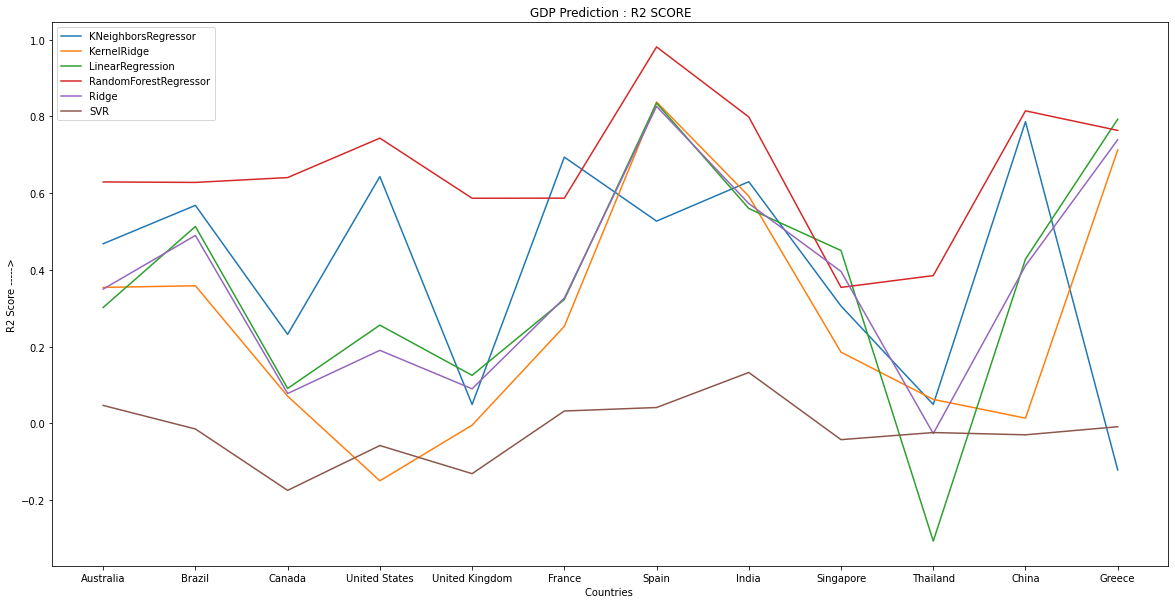

In [11]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
models_name = [ type(a).__name__ for a in all_regs]
plt.xlabel('Countries ')
plt.ylabel('R2 Score ----->')
plt.title('GDP Prediction : R2 SCORE')
for x in r2_list.T.keys():
    plt.plot( r2_list.T.index, r2_list.T[x])
plt.legend(models_name)

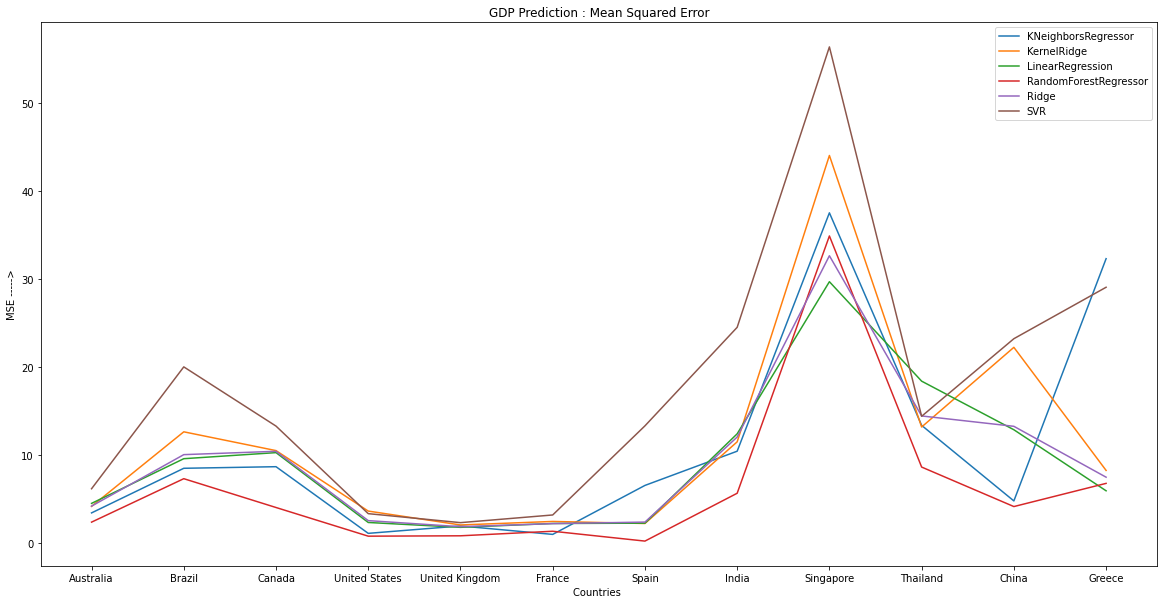

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.xlabel('Countries ')
plt.ylabel('MSE ----->')
plt.title('GDP Prediction : Mean Squared Error')
models_name = [ type(a).__name__ for a in all_regs]
for x in mse_list.T.keys():
    plt.plot( mse_list.T.index, mse_list.T[x])
plt.legend(models_name)